# Introduction to cartography with Python

Lino Galiana  
2025-12-26

<div class="badge-container"><div class="badge-text">If you want to try the examples in this tutorial:</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/en/visualisation/maps.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«maps»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«en/visualisation%20maps»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«maps»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«en/visualisation%20maps»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//en/blob/main//notebooks/en/visualisation/maps.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>


<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Skills you will acquire in this chapter
</div>
</div>
<div class="callout-body-container callout-body">

-   Understand the key challenges of cartography when visualizing spatial data  
-   Use Python to create maps based on core principles of geographic representation  
-   Work through hands-on exercises to explore practical cartographic techniques  
-   Apply tools and methods from the spatial data section to build effective map-based visualizations  
-   Follow the pedagogical progression to learn how to translate spatial information into clear, informative maps

</div>
</div>

# 1. Introduction

With the proliferation of geolocated data and the increasing use of data-driven decision-making, it has become crucial for *data scientists* to quickly create maps. This chapter, complementing the one on [spatial data](../../content/manipulation/03_geopandas_intro.qmd), offers exercises to explore the key principles of data visualization through cartography using `Python`.

Cartography is one of the oldest forms of graphical representation of information. Historically confined to military and administrative uses or navigation-related information synthesis, cartography has, at least since the 19th century, become one of the preferred ways to represent information. It was during this period that the color-shaded map, known as the choropleth map, began to emerge as a standard way to visualize geographic data.

According to Chen et al. (2008), the first representation of this type was proposed by Charles Dupin in 1826 <a href="#fig-dupin" class="quarto-xref">Figure 1.1</a> to illustrate literacy levels across France. The rise of choropleth maps is closely linked to the organization of power through unitary political entities. For instance, world maps often use color shades to represent nations, while national maps use administrative divisions (regions, departments, municipalities, as well as states or *Länder*).

<figure id="fig-dupin">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Carte_figurative_de_l%27instruction_populaire_de_la_France.jpg/800px-Carte_figurative_de_l%27instruction_populaire_de_la_France.jpg" />
<figcaption>Figure 1.1: The first choropleth map by Dupin (1826)</figcaption>
</figure>

The emergence of choropleth maps during the 19th century marks an important shift in cartography, transitioning from military use to political application. No longer limited to depicting physical terrain, maps began to represent socioeconomic realities within well-defined administrative boundaries.


<div class="callout callout-style-default callout-note callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Note
</div>
</div>
<div class="callout-body-container callout-body">

Creating high-quality maps requires time but also thoughtful decision-making. Like any graphical representation, it is essential to consider the message being conveyed and the most appropriate means of representation. Cartographic semiology, a scientific discipline focusing on the messages conveyed by maps, provides guidelines to prevent misleading representations—whether intentional or accidental.

Some of these principles are outlined in this [cartographic semiology guide](https://www.insee.fr/fr/statistiques/3640429) from Insee. They are also summarized in [this guide](https://juliedjidji.github.io/memocarto/semio.html).

[This presentation](https://neocarto.github.io/docs/slides/ENTPE/docs/#/title-slide) by Nicolas Lambert, using numerous examples, explores key principles of cartographic *dataviz*.

</div>
</div>

This chapter will first introduce some basic functionalities of [`Geopandas`](https://geopandas.org/mapping.html) for creating static maps. To provide context to the presented information, we will use official geographic boundaries produced by IGN. We will then explore maps with enhanced contextualization and multiple levels of information, illustrating the benefits of using interactive libraries based on `JavaScript`, such as [`Folium`](https://python-visualization.github.io/folium/latest/).

## 1.1 Data Used

Throughout this chapter, we will use several datasets to illustrate different types of maps:

-   Population counts;
-   Departmental boundaries of metropolitan France;
-   Municipal boundaries of Finistère;
-   Forest cover in the Landes department;
-   The location of Vélib’ stations;

## 1.2 Prerequisite installations

Before getting started, a few packages need to be installed:


In [ ]:
# Sur colab
!pip install pandas fiona shapely pyproj rtree geopandas

We will primarily need `Pandas` and `GeoPandas` for this chapter.


In [ ]:
import pandas as pd
import geopandas as gpd

# 2. First Maps to Understand the Spatial Coverage of Your Data

We will use `cartiflette`, which simplifies the retrieval of administrative basemaps from IGN. This package is an interministerial project designed to provide a simple `Python` interface for obtaining official IGN boundaries.

First, we will retrieve the departmental boundaries:


In [ ]:
from cartiflette import carti_download

departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

These data bring the DROM closer to mainland France, as explained in one of the [`cartiflette` tutorials](https://github.com/inseeFrLab/cartiflette-website/) and as Exercise 1 will allow us to verify.

Exercise 1 aims to ensure that we have correctly retrieved the desired boundaries by simply visualizing them. This should be the first reflex of any *geodata scientist*.


<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Exercise 1: Representing Boundaries with GeoPandas Methods
</div>
</div>
<div class="callout-body-container callout-body">

1.  Use the `plot` method on the `departements` dataset to check the spatial extent. What projection do the displayed coordinates suggest? Verify using the `crs` method.  
2.  Reproject the data to Lambert 93 (EPSG: 2154) and create the same map.  
3.  Using appropriate `matplotlib` options, create a map with black boundaries, a white background, and no axes.  
4.  Create the same map for the municipalities of Finistère.  

</div>
</div>

The map of the departments, without modifying any options, looks like this:


The displayed coordinates suggest `WGS84`, which can be verified using the `crs` method:


If we convert to Lambert 93 (the official system for mainland France), we obtain a different extent, which is supposed to be more accurate for the mainland (but not for the relocated DROM, since, for example, French Guiana is actually much larger).


And of course, we can easily reproduce the failed maps from the [chapter on `GeoPandas`](../../content/manipulation/03_geopandas_intro.qmd), for example, if we apply a transformation designed for North America:


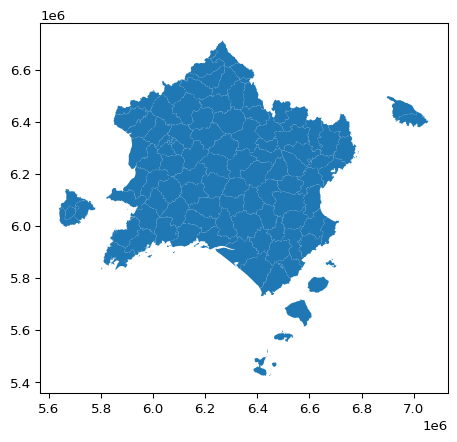

In [ ]:
departements.to_crs(5070).plot()

If we create a slightly more aesthetically pleasing map, we get:


And the same for Finistère:


These maps are simple, yet they already rely on implicit knowledge. They require familiarity with the territory. When we start coloring certain departments, recognizing which ones have extreme values will require a good understanding of French geography. Likewise, while it may seem obvious, nothing in our map of Finistère explicitly states that the department is bordered by the ocean. A French reader would see this as self-evident, but a foreign reader, who may not be familiar with the details of our geography, would not necessarily know this.

To address this, we can use interactive maps that allow:

-   Displaying contextual information when hovering over or clicking on an element of the map.
-   Displaying a basemap with contextual information such as transport networks, localities, or natural boundaries.

For this, we will retain only the data corresponding to an actual spatial extent, excluding our zoom on Île-de-France and the DROM.


In [ ]:
departements_no_duplicates = (
  departements
  .drop_duplicates(subset = "INSEE_DEP")
)
departements_hexagone = (
  departements_no_duplicates
  .loc[~departements['INSEE_DEP'].str.startswith("97")]
)

We successfully obtain the hexagon:


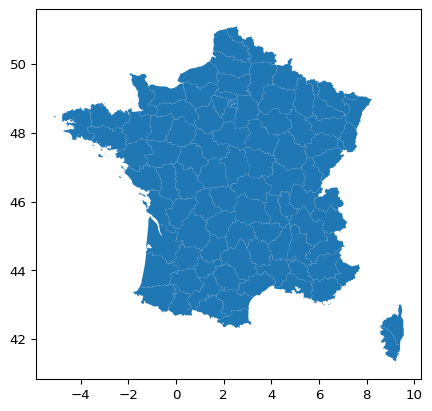

In [ ]:
departements_hexagone.plot()

For the next exercise, we will need a few additional variables. First, the geometric center of France, which will help us position the center of our map.


In [ ]:
minx, miny, maxx, maxy = departements_hexagone.total_bounds
center = [(miny + maxy) / 2, (minx + maxx) / 2]

We will also need a dictionary to provide `Folium` with information about our map parameters.


In [ ]:
style_function = lambda x: {
    'fillColor': 'white',
    'color': 'black',     
    'weight': 1.5,        
    'fillOpacity': 0.0   
}

`style_function` is an anonymous function that will be used in the exercise.

Information that appears when hovering over an element is called a *tooltip* in web development terminology.


In [ ]:
import folium
tooltip = folium.GeoJsonTooltip(
    fields=['LIBELLE_DEPARTEMENT', 'INSEE_DEP', 'POPULATION'],
    aliases=['Département:', 'Numéro:', 'Population:'],
    localize=True
)

For the next exercise, the *GeoDataFrame* must be in the Mercator projection. `Folium` requires data in this projection because it relies on navigation basemaps, which are designed for this representation. Typically, `Folium` is used for local visualizations where the surface distortion caused by the Mercator projection is not problematic.

For the next exercise, where we will represent France as a whole, we are slightly repurposing the library. However, since France is still relatively far from the North Pole, the distortion remains a small trade-off compared to the benefits of interactivity.


<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Exercise 2: Creating a First Interactive Map with Folium
</div>
</div>
<div class="callout-body-container callout-body">

1.  Create the base layer using the `center` object and set `zoom_start` to 5.  
2.  Update it using our `departements_hexagone` dataset and the parameters `style_function` and `tooltip`.

</div>
</div>

Here is the base layer from question 1:

And once formatted, this gives us the map:


When hovering over the above map, some contextual information appears. This allows for different levels of information: at first glance, the data is spatially represented, while further exploration reveals secondary details that aid understanding but are not essential.

These initial exercises illustrated a situation where only the polygon boundaries are represented. This type of map is useful for quickly situating a dataset in space, but it does not provide additional information. To achieve that, it will be necessary to use the tabular data associated with the spatial dimension.

# 3. Representing data: A First Example with a Forest Cover Map

In this section, we will create a map of the Landes forest cover using the BD Forêt dataset produced by IGN. The goal is no longer just to display the boundaries of the area of interest but to represent information about it using data from a *GeoDataFrame*.

Since BD Forêt is somewhat large in *shapefile* format, we suggest retrieving it in a more compressed format: *geopackage*.


In [ ]:
foret = gpd.read_file(
  "https://minio.lab.sspcloud.fr/projet-formation/diffusion/r-geographie/landes.gpkg"
)

We also need a mask for administrative area


In [ ]:
landes = (
  departements
  .loc[departements["INSEE_DEP"] == "40"].to_crs(2154)
)


<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Exercise 3: First Choropleth Map
</div>
</div>
<div class="callout-body-container callout-body">

Create a map of the forest cover in Landes using data previously imported from the BD Forêt dataset. You can add the department boundaries to provide context for this map.

This map can be created using `Geopandas` and `matplotlib` or with `plotnine` (see [previous chapter](../../content/visualization/matplotlib.qmd)).

</div>
</div>

As seen on the map (<a href="#fig-landes" class="quarto-xref">Figure 3.1</a>), the Landes department is heavily forested. This makes sense since two-thirds of the department are covered, which can be verified with the following calculation[1]:

[1] This calculation is possible because both datasets are in the Lambert 93 projection, which allows for geometric operations (including surface area calculations).


In [ ]:
f"Part du couvert forestier dans les Landes: {float(foret.area.sum()/landes.area):.0%}"

/tmp/ipykernel_9851/849176039.py:1: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead


'Part du couvert forestier dans les Landes: 65%'

Here, the map is quite clear and conveys a relatively readable message. Of course, it does not provide details that might interest curious viewers (e.g., which specific localities are particularly forested), but it does offer a synthetic view of the studied phenomenon.

# 4. Introduction to choropleth maps

The previous exercise allowed us to create a solid color map. This naturally leads us to choropleth maps, where color shading is used to represent socioeconomic information.

We will use population data available from the datasets retrieved via `cartiflette`[1]. As an exercise, we will create a choropleth map styled in a *vintage* look, reminiscent of the early maps of Dupin (1826).


<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Exercise 4: A First Population Map
</div>
</div>
<div class="callout-body-container callout-body">

The goal of this exercise is to enhance the information presented on the departmental map.

1.  Quickly generate a map of the departments, coloring them according to the `POPULATION` variable.

    This map presents several issues:

    -   If you are familiar with French geography, you should notice an unusual shape, as if the east-west axis were excessively stretched. This happens because the map needs to be reprojected into Lambert 93.  
    -   It is difficult to read due to several factors: continuous gradient, non-normal distribution of the variable, suboptimal legend, etc.

    The next questions aim to improve this step by step.

2.  Recreate this map using the Lambert 93 projection.  

3.  Discretize the `POPULATION` variable into 4 classes using quantile-based discretization, then recreate the map.  

4.  Normalize the population by the area of each department (in km²) by creating a new variable using `.area.div(1e6)`[2].  

5.  Choose a *vintage* grayscale color palette.

</div>
</div>

The first question produces a map that looks like this:

[1] *Stricto sensu*, we should verify that these columns accurately correspond to the official population counts defined by Insee. This variable is natively provided by IGN in its basemap data. We leave this verification to interested readers, as it offers a good opportunity to practice `Pandas` skills.

[2] Lambert 93 provides area in square meters. To convert it to km², use `div(1e6)`.


It is already improved by using a projection suited for the territory, Lambert 93 (question 2):


The map below, after discretization (question 3), already provides a more accurate representation of population inequalities. We can see the “diagonal of emptiness” starting to emerge, which is expected in a population map.


However, one of the problems with choropleth maps is that they give disproportionate visual weight to large areas. This issue was particularly highlighted in election maps with the visual [“Land doesn’t vote, people do”](https://x.com/karim_douieb/status/1181934417650040832) (see the [2024 European elections version](https://x.com/karim_douieb/status/1800777148871188766)).

While we cannot completely eliminate this issue—doing so would require switching to a different type of visualization, such as proportional circles—we can mitigate the effect of area on our variable of interest by representing density (population per km² rather than total population).

We obtain the following map when representing population density instead of total population:


This already provides a more accurate picture of population distribution across France. However, the default *desigual* color palette does not help much in capturing the nuances. Using a gradient color palette, which considers the ordinal nature of our data, results in a more readable map (question 5):


This is already better. However, to create an even more effective map, a more suitable discretization method should be chosen. This is an important iterative process that requires multiple skill sets, including statistics, sociology or economics (depending on the type of information represented), and computer science. In short, the typical skill set of a *data scientist*.

# 5. Representing sub-municipal data

Until now, we have worked with data where simply displaying administrative boundaries was sufficient for context. Now, let’s focus on a case where having a contextual basemap becomes crucial: sub-municipal maps.

For this, we will represent the locations of Vélib’ stations. These are available as *open data* from the Paris City Hall website.

Velib station location dataset is available from Paris opendata portal as a `GeoJSON` file:


In [ ]:
import geopandas as gpd

velib_data = "https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
stations = gpd.read_file(velib_data)

stations.head(2)

Administrative borders are going to be useful. Here is a snippet to retrieve them:


In [ ]:
from cartiflette import carti_download

# 1. Fonds communaux
contours_villes_arrt = carti_download(
    values = ["75", "92", "93", "94"],
    crs = 4326,
    borders="COMMUNE_ARRONDISSEMENT",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

# 2. Départements 
departements = contours_villes_arrt.dissolve("INSEE_DEP")


<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Exercise 5: a sub-municipal location map
</div>
</div>
<div class="callout-body-container callout-body">

1.  Show the station locations using the `plot` method. Can you determine where they are?
2.  To contextualize, add administrative boundaries to the map.
3.  Use the `MarkerCluster` feature in `Folium` to create an interactive map.

</div>
</div>

If we directly plot stations using the `plot` method, we lack context:


It is even impossible to determine whether we are actually in Paris. We can attempt to associate our data with administrative boundaries to confirm that we are indeed in the Paris region.

The first step is to retrieve the boundaries of Parisian districts and neighboring municipalities, which can be easily done using `cartiflette`:

If we now use administrative areas mask to provide context, we can be reassured about the nature of the data.


Parisians will easily recognize their city because they are familiar with the spatial organization of this metropolitan area. However, for readers unfamiliar with it, this map will be of little help. The ideal solution is to use `Folium`’s contextual basemap.

To avoid cluttering the map, it is useful to leverage `Folium`’s interactive features, allowing the user to navigate the map and display an appropriate amount of information based on the visible window. For this, `Folium` includes a very handy `MarkerCluster` functionality.

Thus, we can create the desired map as follows:


# Additional References

Chen, Chun-houh, Wolfgang Härdle, Antony Unwin, and Michael Friendly. 2008. “A Brief History of Data Visualization.” *Handbook of Data Visualization*, 15–56.
